# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Arthur Setiawan Waruwu]
- **Email:** [arthurwaruwu123@gmail.com]
- **ID Dicoding:** [Arthur Setiawan Waruwu]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:Bagaimana musim dan kondisi cuaca memengaruhi jumlah peminjaman sepeda?
- Pertanyaan 2: Kapan waktu peminjaman sepeda tertinggi dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Data Wrangling

### Gathering Data

Mengumpulkan dan membaca dataset yang telah didownload dan akan dianalisis

In [5]:
path_hour = "data/hour.csv" #membaca hour.csv
jam_df = pd.read_csv(path_hour)
jam_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
path_day = "data/day.csv"
hari_df = pd.read_csv(path_day)
hari_df.head() #membaca day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Insight: Kedua Csv ini memiliki kolom yang hampir sama dan yang membedakan cuma adanya kolom "hr" pada hour.csv

Pada hour.csv ada 17 kolom sedangkan pada day.csv ada 16 kolom

### Assessing Data

Menilai data yang ada pada hour.csv dan jam.csv

In [5]:
hari_df.info() #melihat tipe data  dan jumlah data pada setiap kolom  pada dataframe hari

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hari_df.isna().sum() #melihat jumlah data yang kosong pada setiap kolom

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hari_df.duplicated().sum() #melihat jumlah data yang duplikat pada dataframe hari

np.int64(0)

In [8]:
hari_df.describe() #melihat statistik deskriptif dari dataframe hari

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
jam_df.info()    #melihat tipe data  dan jumlah data pada setiap kolom di dataframe jam

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
jam_df.duplicated().sum() #melihat jumlah data yang duplikat pada setiap kolom di dataframe jam

np.int64(0)

In [11]:
jam_df.describe() #melihat statistik deskriptif dari dataframe jam

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
jam_df.isna().sum() #melihat jumlah data yang kosong pada setiap kolom di dataframe jam

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Pada dataframe hari, tidak ditemukan adanya data yang duplikat, missing value tetapi ada kolom yang tipe datanya tidak sesuai
- Pada dataframe jam, tidak ditemukan adanya data yang duplikat, missing value tetapi ada kolom yang tipe datanya tidak sesuai

### Cleaning Data

In [13]:
jam_df = jam_df.drop(columns=['hr']) #menghapus kolom hr pada dataframe jam dikarenakan saya tidak membutuhkannya
jam_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
merged_df = pd.concat([jam_df, hari_df], ignore_index=True) #menggabungkan data dari dataframe jam dan dataframe hari karena memilili kolom yang sama

# Simpan hasil penggabungan ke combined_dataset csv
merged_df.to_csv("combined_dataset.csv", index=False)

In [16]:
merged_df.info()
merged_df.isna().sum() #melihat jumlah data yang kosong pada setiap kolom merged_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   holiday     18110 non-null  int64  
 6   weekday     18110 non-null  int64  
 7   workingday  18110 non-null  int64  
 8   weathersit  18110 non-null  int64  
 9   temp        18110 non-null  float64
 10  atemp       18110 non-null  float64
 11  hum         18110 non-null  float64
 12  windspeed   18110 non-null  float64
 13  casual      18110 non-null  int64  
 14  registered  18110 non-null  int64  
 15  cnt         18110 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.2+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:

print("Jumlah duplikasi:",merged_df.duplicated().sum()) #melihat jumlah data yang duplikat pada setiap kolom merged_df
merged_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
mean,8354.006405,2.501436,0.502485,6.537051,0.028769,3.003424,0.682772,1.424075,0.496922,0.475718,0.627256,0.190113,68.472336,295.158697,363.631033
std,5180.771860,1.107045,0.500008,3.439213,0.167160,2.005677,0.465410,0.635830,0.192177,0.171496,0.191147,0.120851,216.588054,771.555142,950.827954
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,37.000000,43.000000
50%,8324.500000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.188951,18.000000,123.000000,152.000000
75%,12851.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,55.000000,238.000000,305.000000
max,17379.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,3410.000000,6946.000000,8714.000000


In [18]:
# Denormalisasi nilai agar kembali ke skala sebenarnya
merged_df["temp"] = merged_df["temp"] * 41  # Suhu dalam Celsius
merged_df["atemp"] = merged_df["atemp"] * 50  # Suhu yang terasa dalam Celsius
merged_df["hum"] = merged_df["hum"] * 100  # Kelembaban dalam %
merged_df["windspeed"] = merged_df["windspeed"] * 67  # Kecepatan angin dalam km/h

# Cek hasil perubahan
merged_df[["temp", "atemp", "hum", "windspeed"]].head()





,temp,atemp,hum,windspeed
0,9.84,14.395,81.0,0.0
1,9.02,13.635,80.0,0.0
2,9.02,13.635,80.0,0.0
3,9.84,14.395,75.0,0.0
4,9.84,14.395,75.0,0.0


In [20]:
# Ubah nilai numerik di kolom 'season' menjadi teks
season_mapping = {
    1: "springer",
    2: "summer",
    3: "fall",
    4: "winter"
}

# Ubah nilai numerik di kolom 'yr' menjadi teks
year_mapping = {
    0: "2011",
    1: "2012"
}
#ubah nilai numerik dikolom "weathersit" menjadi teks
weather_mapping = {
    1: "Clear/Few clouds/Partly cloudy",
    2: "Mist/Cloudy/Broken clouds/Few clouds",
    3: "Light Snow/Light Rain/Thunderstorm/Scattered clouds",
    4: "Heavy Rain/Ice Pellets/Thunderstorm/Mist/Snow/Fog"
}
#mapping hari
hari_mapping = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}
bulan_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
#replace sesuai dengan mapping yang sudah dibuat
merged_df["yr"] = merged_df["yr"].replace(year_mapping)
merged_df["season"] = merged_df["season"].replace(season_mapping)
merged_df["weathersit"] = merged_df["weathersit"].replace(weather_mapping)
merged_df["weekday"] = merged_df["weekday"].replace(hari_mapping)
merged_df["mnth"] = merged_df["mnth"].replace(bulan_mapping)

# menyimpan hasil replace ke combined_dataset
merged_df.to_csv("combined_dataset.csv", index=False)

In [21]:
merged_df.rename(columns={"cnt": "total_rent"}, inplace=True)
merged_df.rename(columns={"yr": "year"}, inplace=True)
merged_df.rename(columns={"dteday": "dateday"}, inplace=True)
merged_df.rename(columns={"mnth": "month"}, inplace=True)
merged_df.rename(columns={"weekday": "day_of_week"}, inplace=True)
merged_df.rename(columns={"weathersit": "weather_condition"}, inplace=True)
merged_df.rename(columns={"casual": "casual_user"}, inplace=True)
merged_df.rename(columns={"registered": "registered_user"}, inplace=True)
merged_df.rename(columns={"instant": "index"}, inplace=True) #mengganti seluruh nama kolom yang ambigu


In [22]:
merged_df.describe(include="all")

,index,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,hum,windspeed,casual_user,registered_user,total_rent
count,18110.000000,18110,18110,18110,18110,18110.000000,18110,18110.000000,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
unique,NaN,731,4,2,12,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,fall,2012,July,NaN,Saturday,NaN,Clear/Few clouds/Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,4684,9100,1550,NaN,2617,NaN,11876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,NaN,NaN,NaN,0.028769,NaN,0.682772,NaN,20.373822,23.785887,62.725569,12.737591,68.472336,295.158697,363.631033
std,5180.771860,NaN,NaN,NaN,NaN,0.167160,NaN,0.465410,NaN,7.879256,8.574814,19.114699,8.097047,216.588054,771.555142,950.827954
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,37.000000,43.000000
50%,8324.500000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.659683,18.000000,123.000000,152.000000
75%,12851.750000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,55.000000,238.000000,305.000000


In [23]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18110 non-null  int64  
 1   dateday            18110 non-null  object 
 2   season             18110 non-null  object 
 3   year               18110 non-null  object 
 4   month              18110 non-null  object 
 5   holiday            18110 non-null  int64  
 6   day_of_week        18110 non-null  object 
 7   workingday         18110 non-null  int64  
 8   weather_condition  18110 non-null  object 
 9   temp               18110 non-null  float64
 10  atemp              18110 non-null  float64
 11  hum                18110 non-null  float64
 12  windspeed          18110 non-null  float64
 13  casual_user        18110 non-null  int64  
 14  registered_user    18110 non-null  int64  
 15  total_rent         18110 non-null  int64  
dtypes: float64(4), int64(6

**Insight:**
- Saya menghapus kolom hr di hour.csv dikarenakan saya tidak membutuhkan datanya untuk visualisasi ataupun analisis selanjutnya
- Saya telah mengubah data pada beberapa kolom agar lebih sesuai dan tidak rancu
- Saya melihat semua tipe data dan nama kolom sudah pas

## Exploratory Data Analysis (EDA)

### Explore ...

In [24]:
merged_df.sample(5)

,index,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,hum,windspeed,casual_user,registered_user,total_rent
13566,13567,2012-07-24,fall,2012,July,0,Tuesday,1,Mist/Cloudy/Broken clouds/Few clouds,34.44,40.150,53.0,22.0028,45,156,201
4735,4736,2011-07-21,fall,2011,July,0,Thursday,1,Mist/Cloudy/Broken clouds/Few clouds,29.52,35.605,84.0,7.0015,2,16,18
9696,9697,2012-02-13,springer,2012,February,0,Monday,1,Clear/Few clouds/Partly cloudy,11.48,15.910,41.0,0.0000,2,34,36
2315,2316,2011-04-11,summer,2011,April,0,Monday,1,Mist/Cloudy/Broken clouds/Few clouds,22.96,26.515,83.0,19.0012,33,132,165
9028,9029,2012-01-17,springer,2012,January,0,Tuesday,1,Mist/Cloudy/Broken clouds/Few clouds,11.48,12.880,65.0,23.9994,0,2,2


In [25]:
merged_df.describe(include="all")

,index,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,hum,windspeed,casual_user,registered_user,total_rent
count,18110.000000,18110,18110,18110,18110,18110.000000,18110,18110.000000,18110,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000,18110.000000
unique,NaN,731,4,2,12,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,fall,2012,July,NaN,Saturday,NaN,Clear/Few clouds/Partly cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,25,4684,9100,1550,NaN,2617,NaN,11876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8354.006405,NaN,NaN,NaN,NaN,0.028769,NaN,0.682772,NaN,20.373822,23.785887,62.725569,12.737591,68.472336,295.158697,363.631033
std,5180.771860,NaN,NaN,NaN,NaN,0.167160,NaN,0.465410,NaN,7.879256,8.574814,19.114699,8.097047,216.588054,771.555142,950.827954
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3797.250000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,37.000000,43.000000
50%,8324.500000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.659683,18.000000,123.000000,152.000000
75%,12851.750000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,55.000000,238.000000,305.000000


In [26]:
merged_df["holiday"].value_counts()

holiday
0    17589
1      521
Name: count, dtype: int64

In [27]:
merged_df["workingday"].value_counts()

workingday
1    12365
0     5745
Name: count, dtype: int64

In [28]:
print(f"Jumlah nilai unik dalam kolom registered user: {merged_df['registered_user'].nunique()}")
print(f"Beberapa contoh nilai registered user: {merged_df['registered_user'].unique()[:10]}")


Jumlah nilai unik dalam kolom registered user: 1440
Beberapa contoh nilai registered user: [13 32 27 10  1  0  2  7  6 24]


In [29]:

# Pastikan kolom dteday dalam dataset memiliki format datetime
merged_df["dateday"] = pd.to_datetime(merged_df["dateday"])

# Buat daftar semua tanggal dalam rentang waktu dataset
all_dates = pd.date_range(start=merged_df["dateday"].min(), end=merged_df["dateday"].max())

# Konversi all_dates menjadi DataFrame
all_dates_df = pd.DataFrame({"dateday": all_dates})

# Pastikan tipe data cocok sebelum menggunakan isin()
all_dates_df["dateday"] = pd.to_datetime(all_dates_df["dateday"])
merged_df["dateday"] = pd.to_datetime(merged_df["dateday"])

# Cari tanggal yang hilang
missing_dates = all_dates_df[~all_dates_df["dateday"].isin(merged_df["dateday"])]

# Output hasil
print(f"Jumlah tanggal yang hilang: {missing_dates.shape[0]}")
print(f"Beberapa tanggal yang hilang:\n{missing_dates.head(10)}")


Jumlah tanggal yang hilang: 0
Beberapa tanggal yang hilang:
Empty DataFrame
Columns: [dateday]
Index: []


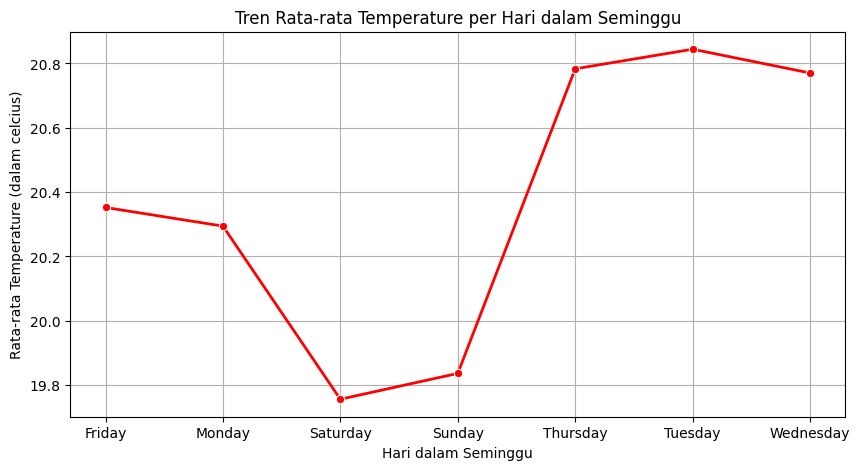

In [30]:
avg_temp_trend = merged_df.groupby("day_of_week")["temp"].mean().reset_index()

# Membuat plot dengan Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_temp_trend, x="day_of_week", y="temp", marker="o", color="red", linewidth=2)

# Menambahkan judul dan label
plt.title("Tren Rata-rata Temperature per Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Temperature (dalam celcius)")
plt.grid(True)

# Menampilkan plot
plt.show()

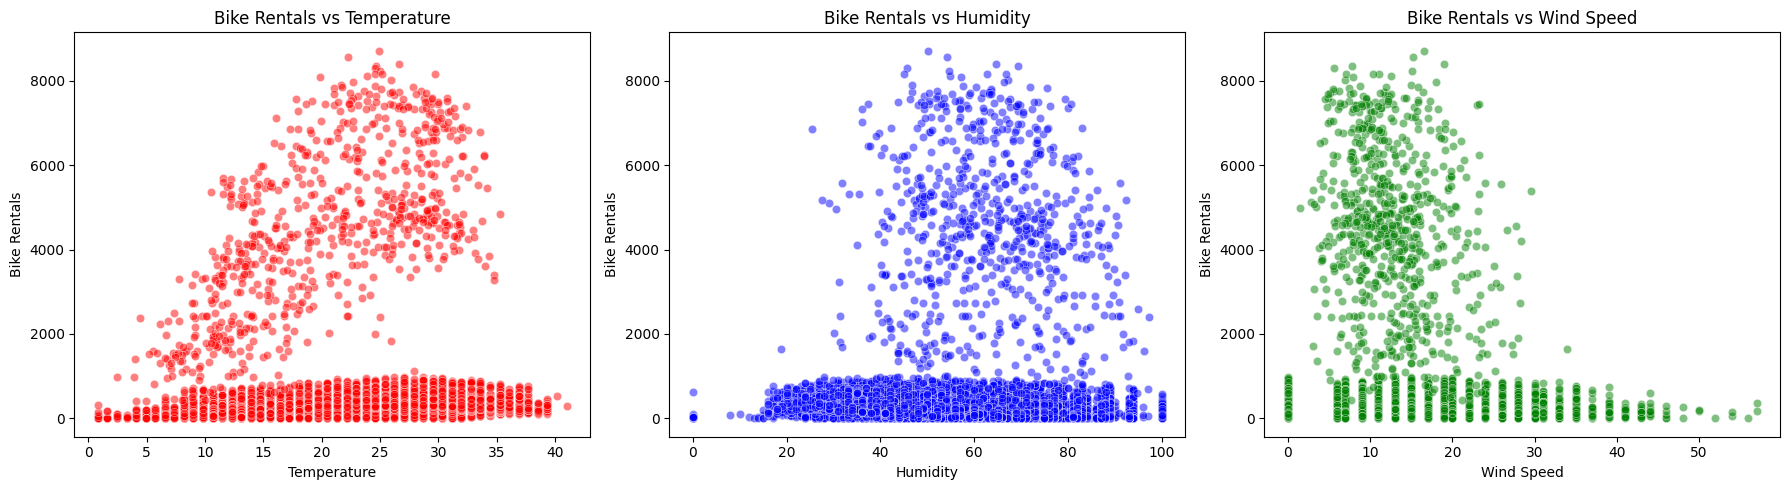

In [31]:
# Membuat scatter plot untuk melihat hubungan antara variabel cuaca dan jumlah peminjaman
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot suhu vs jumlah peminjaman
sns.scatterplot(x=merged_df["temp"], y=merged_df["total_rent"], alpha=0.5, ax=axes[0], color="red")
axes[0].set_title("Bike Rentals vs Temperature")
axes[0].set_xlabel("Temperature")
axes[0].set_ylabel("Bike Rentals")

# Scatter plot kelembaban vs jumlah peminjaman
sns.scatterplot(x=merged_df["hum"], y=merged_df["total_rent"], alpha=0.5, ax=axes[1], color="blue")
axes[1].set_title("Bike Rentals vs Humidity")
axes[1].set_xlabel("Humidity")
axes[1].set_ylabel("Bike Rentals")

# Scatter plot kecepatan angin vs jumlah peminjaman
sns.scatterplot(x=merged_df["windspeed"], y=merged_df["total_rent"], alpha=0.5, ax=axes[2], color="green")
axes[2].set_title("Bike Rentals vs Wind Speed")
axes[2].set_xlabel("Wind Speed")
axes[2].set_ylabel("Bike Rentals")

plt.tight_layout()
plt.show()

In [32]:
merged_df_grouped = merged_df.groupby("dateday")[["total_rent", "casual_user", "registered_user"]].sum().reset_index()#melihat hubungan antara dateday,totalrent dan user
merged_df_grouped.sample(10)

,dateday,total_rent,casual_user,registered_user
405,2012-02-10,7662,454,7208
47,2011-02-17,4950,518,4432
43,2011-02-13,3178,794,2384
93,2011-04-04,6230,1468,4762
728,2012-12-29,2682,318,2364
176,2011-06-26,10610,3840,6770
422,2012-02-27,8644,506,8138
186,2011-07-06,9258,1568,7690
413,2012-02-18,8636,2870,5766
483,2012-04-28,8440,2240,6200


In [33]:
merged_df.groupby("holiday")["total_rent"].sum() #Menghitung jumlah penyewaan sepeda tergantung hari libur


holiday
0    6428488
1     156870
Name: total_rent, dtype: int64

In [34]:
merged_df.groupby("season")["total_rent"].sum() #menghitung jumlah penyewaan berdasarkan musim


season
fall        2122258
springer     942696
summer      1837178
winter      1683226
Name: total_rent, dtype: int64

In [35]:
merged_df.groupby("weather_condition")["total_rent"].sum() #menghitung jumlah penyewaan tergantung cuaca


weather_condition
Clear/Few clouds/Partly cloudy                         4596125
Heavy Rain/Ice Pellets/Thunderstorm/Mist/Snow/Fog          223
Light Snow/Light Rain/Thunderstorm/Scattered clouds     196200
Mist/Cloudy/Broken clouds/Few clouds                   1792810
Name: total_rent, dtype: int64

In [36]:
merged_df.groupby(["season", "weather_condition"])["total_rent"].sum() #menghitung total rental sesuai musim dan kondisi cuaca

season    weather_condition                                  
fall      Clear/Few clouds/Partly cloudy                         1601384
          Light Snow/Light Rain/Thunderstorm/Scattered clouds      57263
          Mist/Cloudy/Broken clouds/Few clouds                    463611
springer  Clear/Few clouds/Partly cloudy                          637314
          Heavy Rain/Ice Pellets/Thunderstorm/Mist/Snow/Fog          223
          Light Snow/Light Rain/Thunderstorm/Scattered clouds      25381
          Mist/Cloudy/Broken clouds/Few clouds                    279778
summer    Clear/Few clouds/Partly cloudy                         1291449
          Light Snow/Light Rain/Thunderstorm/Scattered clouds      50270
          Mist/Cloudy/Broken clouds/Few clouds                    495459
winter    Clear/Few clouds/Partly cloudy                         1065978
          Light Snow/Light Rain/Thunderstorm/Scattered clouds      63286
          Mist/Cloudy/Broken clouds/Few clouds                

In [37]:
merged_df.groupby("day_of_week")["total_rent"].sum()#mengetahui total rental pada hari

day_of_week
Friday       975580
Monday       911006
Saturday     955614
Sunday       888054
Thursday     970790
Tuesday      938218
Wednesday    946096
Name: total_rent, dtype: int64

In [38]:
merged_df.groupby("day_of_week")[["casual_user", "registered_user"]].sum() #mengetahui tren user pada hari

,casual_user,registered_user
day_of_week,,
Friday,156476,819104
Monday,141568,769438
Saturday,307704,647910
Sunday,281042,607012
Thursday,122920,847870
Tuesday,115686,822532
Wednesday,114638,831458


**Insight:**
- Saya mengetahui kalau tanggal tidak ada yang lompat lompat
- Saya sudah mengetahui data terkait pertanyaan bisnis yang saya buat
- Saya sudah mengetahui tren temperatur pada setiap hari

## Visualization & Explanatory Analysis

### Pertanyaan 1::Bagaimana musim dan kondisi cuaca memengaruhi jumlah peminjaman sepeda?

In [39]:
merged_df.head()

,index,dateday,season,year,month,holiday,day_of_week,workingday,weather_condition,temp,atemp,hum,windspeed,casual_user,registered_user,total_rent
0,1,2011-01-01,springer,2011,January,0,Saturday,0,Clear/Few clouds/Partly cloudy,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,springer,2011,January,0,Saturday,0,Clear/Few clouds/Partly cloudy,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,springer,2011,January,0,Saturday,0,Clear/Few clouds/Partly cloudy,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,springer,2011,January,0,Saturday,0,Clear/Few clouds/Partly cloudy,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,springer,2011,January,0,Saturday,0,Clear/Few clouds/Partly cloudy,9.84,14.395,75.0,0.0,0,1,1


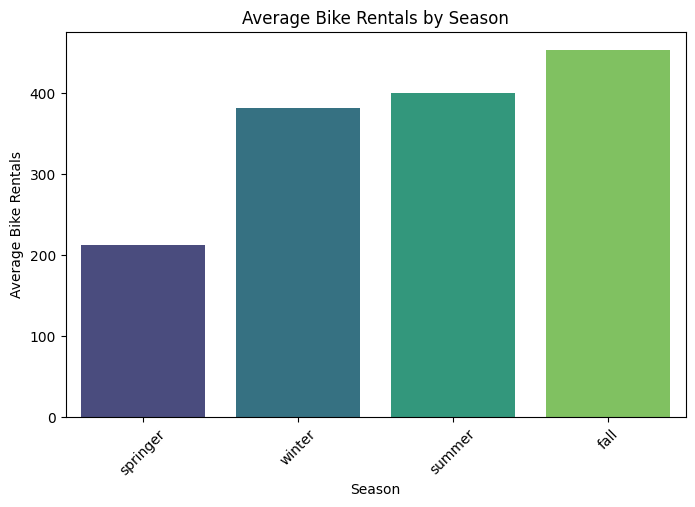

In [40]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata peminjaman
seasonal_counts = merged_df.groupby("season")["total_rent"].mean().sort_values()

# Plot distribusi peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values, palette="viridis", hue=seasonal_counts.index, legend=False)


plt.xlabel("Season")
plt.ylabel("Average Bike Rentals")
plt.title("Average Bike Rentals by Season")
plt.xticks(rotation=45)
plt.show()

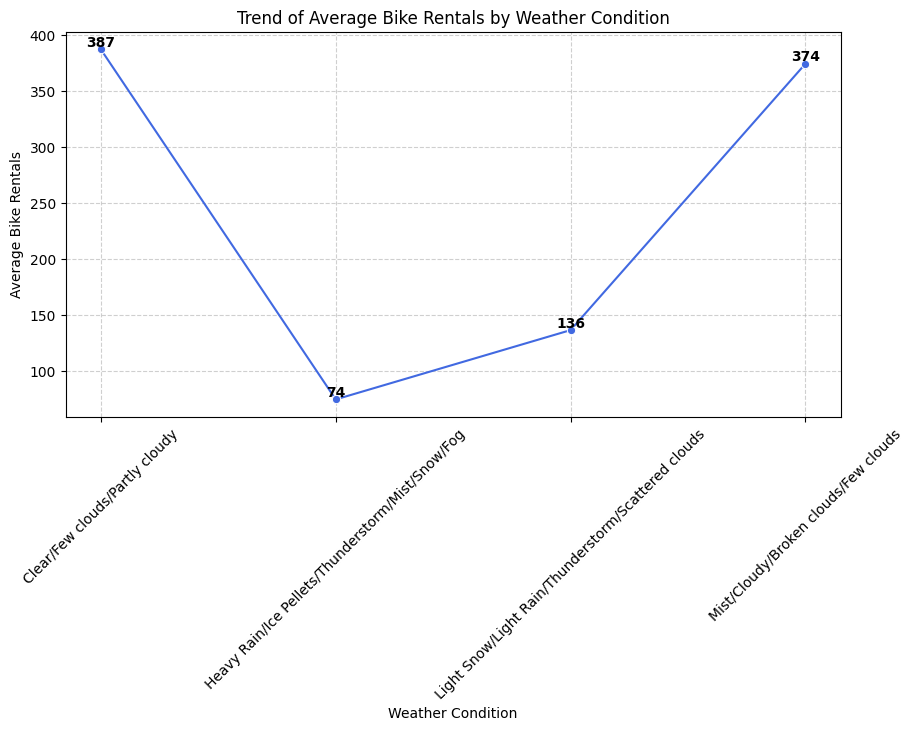

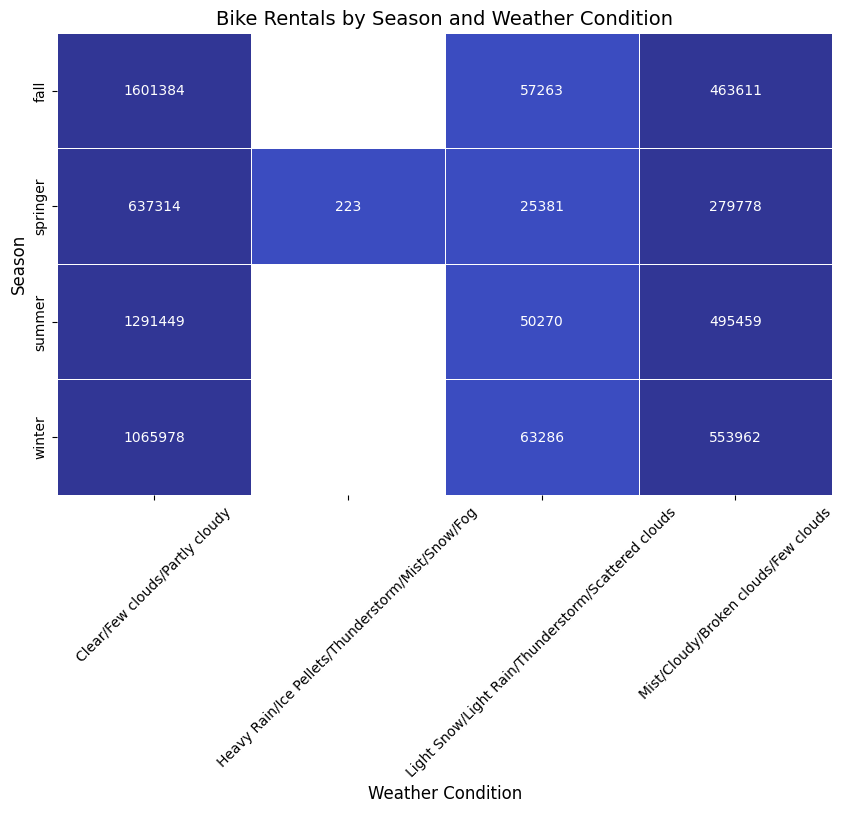

In [46]:


# Membuat pivot table untuk jumlah peminjaman berdasarkan musim dan kondisi cuaca
season_weather_pivot = merged_df.pivot_table(
    values="total_rent",  # Kolom yang akan dijumlahkan
    index="season",       # Baris berdasarkan musim
    columns="weather_condition",  # Kolom berdasarkan kondisi cuaca
    aggfunc="sum"         # Menggunakan total peminjaman sepeda
)

# Menentukan batas untuk perbedaan warna di heatmap
max_value = season_weather_pivot.values.max()
threshold = 100000  # Nilai batasan untuk warna yang berbeda

# Normalisasi rentang warna untuk membuatnya lebih terlihat pada warna yang sesuai
norm = plt.Normalize(vmin=0, vmax=max_value)

# Membuat heatmap dengan rentang warna yang disesuaikan, tanpa colorbar
plt.figure(figsize=(10, 6))
sns.heatmap(season_weather_pivot, annot=True, fmt=".0f", linewidths=0.5,
            cmap="coolwarm", cbar=False, norm=norm, vmin=0, vmax=max_value)

# Menambahkan warna dengan perbedaan untuk nilai di atas threshold
sns.heatmap(season_weather_pivot, annot=False, fmt=".0f", linewidths=0.5,
            cmap='RdYlBu_r', mask=season_weather_pivot < threshold, cbar=False,
            norm=norm, vmin=0, vmax=max_value)

plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Season", fontsize=12)
plt.title("Bike Rentals by Season and Weather Condition", fontsize=14)
plt.xticks(rotation=45)  # Membuat label sumbu-x miring

plt.show()


### Pertanyaan 2:Kapan waktu peminjaman sepeda tertinggi dalam seminggu?

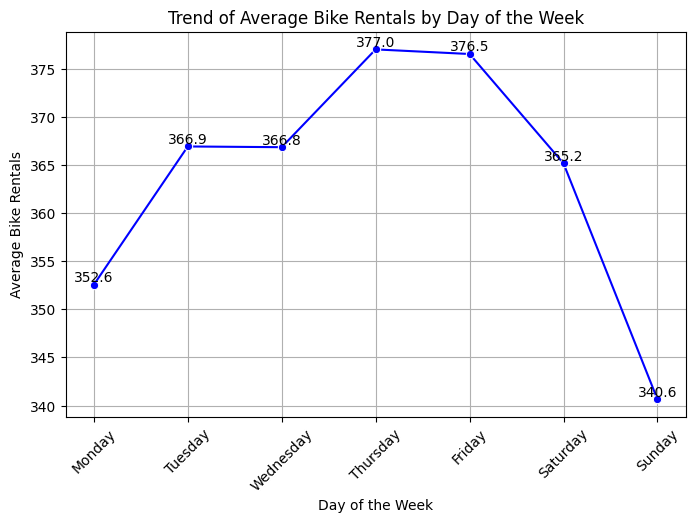

In [54]:


# Pastikan urutan hari dalam seminggu
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Kelompokkan total peminjaman sepeda berdasarkan hari dalam seminggu (gunakan mean untuk rata-rata)
weekday_sorted = merged_df.groupby("day_of_week")["total_rent"].mean().reset_index()

# Konversi ke kategori untuk memastikan urutan hari yang benar
weekday_sorted["day_of_week"] = pd.Categorical(weekday_sorted["day_of_week"], categories=day_order, ordered=True)

# Urutkan berdasarkan kategori yang sudah ditetapkan
weekday_sorted = weekday_sorted.sort_values("day_of_week")

# Membuat line chart untuk tren rata-rata peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(8, 5))
sns.lineplot(x=weekday_sorted["day_of_week"], y=weekday_sorted["total_rent"], marker="o", linestyle="-", color="blue")

# Menambahkan anotasi pada setiap titik
for day, value in zip(weekday_sorted["day_of_week"], weekday_sorted["total_rent"]):
    plt.text(day, value, f"{value:.1f}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Day of the Week")
plt.ylabel("Average Bike Rentals")
plt.title("Trend of Average Bike Rentals by Day of the Week")
plt.xticks(rotation=45)

plt.grid(True)  # Menambahkan grid untuk keterbacaan lebih baik
plt.show()


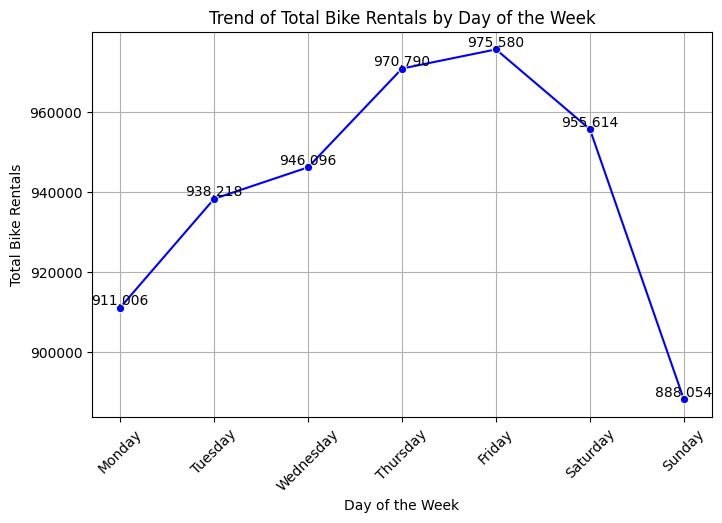

In [55]:
# Pastikan urutan hari dalam seminggu
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Kelompokkan total peminjaman sepeda berdasarkan hari dalam seminggu
weekday_sorted = merged_df.groupby("day_of_week")["total_rent"].sum().reset_index()

# Konversi ke kategori untuk memastikan urutan benar
weekday_sorted["day_of_week"] = pd.Categorical(weekday_sorted["day_of_week"], categories=day_order, ordered=True)

# Urutkan berdasarkan kategori yang sudah ditetapkan
weekday_sorted = weekday_sorted.sort_values("day_of_week")

# Membuat line chart untuk tren total peminjaman sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(8, 5))
sns.lineplot(x=weekday_sorted["day_of_week"], y=weekday_sorted["total_rent"], marker="o", linestyle="-", color="blue")

# Menambahkan anotasi pada setiap titik
for day, value in zip(weekday_sorted["day_of_week"], weekday_sorted["total_rent"]):
    plt.text(day, value, f"{value:,}", ha="center", va="bottom", fontsize=10)

plt.xlabel("Day of the Week")
plt.ylabel("Total Bike Rentals")
plt.title("Trend of Total Bike Rentals by Day of the Week")
plt.xticks(rotation=45)

plt.grid(True)  # Menambahkan grid untuk keterbacaan lebih baik
plt.show()






**Insight:**
- Bisa dilihat bahwa musim yang paling banyak rata rata orang menyewa sepeda adalah musim gugur dan cuaca paling banyak rata rata orang menyewa sepeda adalah saat cuacanya cerah
- Bisa dilihat bahwa tren penyewaan sepeda pada hari dalam setiap minggu naik turun yang menandakan bahwa tidak tentunya pola dan banyaknya faktor naik turun tersebut seperti musim,cuaca

## Analisis Lanjutan (Time Series)

---


Visualisasi tren penggunaan sepeda berdasarkan waktu (hari,bulan, musim, tahun) dan
Deteksi pola musiman dalam penggunaan sepeda.

Tren Berdasar Waktu

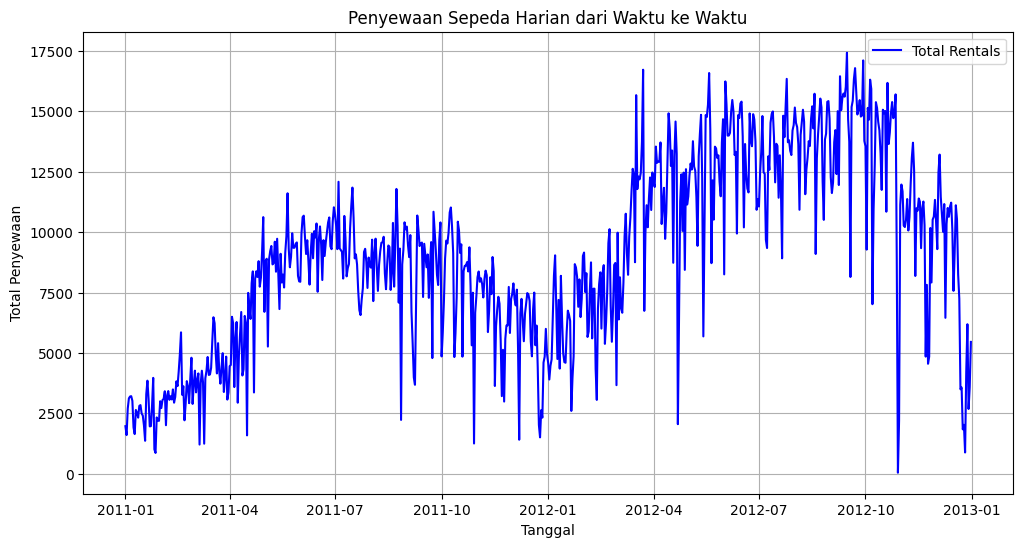

In [60]:


# Mengonversi kolom 'dateday' menjadi tipe data datetime
merged_df['dateday'] = pd.to_datetime(merged_df['dateday'])

# Mengelompokkan data berdasarkan tanggal dan menjumlahkan total penyewaan harian
df_daily = merged_df.groupby('dateday')['total_rent'].sum().reset_index()

# Membuat plot deret waktu untuk melihat tren penyewaan sepeda harian
plt.figure(figsize=(12, 6))  # Menentukan ukuran gambar grafik
plt.plot(df_daily['dateday'], df_daily['total_rent'], label="Total Rentals", color='blue')  # Membuat garis tren

# Menambahkan label sumbu X dan Y
plt.xlabel("Tanggal")
plt.ylabel("Total Penyewaan")

# Menambahkan judul grafik
plt.title("Penyewaan Sepeda Harian dari Waktu ke Waktu")

# Menampilkan legenda untuk menjelaskan garis dalam grafik
plt.legend()

# Menambahkan grid agar lebih mudah membaca grafik
plt.grid(True)

# Menampilkan grafik
plt.show()


Text(0.5, 1.0, 'Pola Penyewaan Sepeda Secara Musiman')

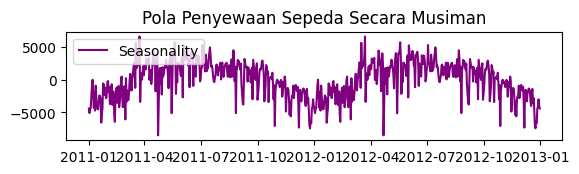

In [66]:
# Dekomposisi time series menggunakan model aditif
decomposition = seasonal_decompose(df_daily.set_index('dateday')['total_rent'], model='additive', period=365)

# Plot pola musiman (seasonality)
plt.subplot(312)  # Baris ke-2 dari 3 subplot
plt.plot(decomposition.seasonal, label='Seasonality', color='purple')
plt.legend(loc='upper left')
plt.title('Pola Penyewaan Sepeda Secara Musiman')


Text(0.5, 1.0, 'Trend Penyewaan Sepeda')

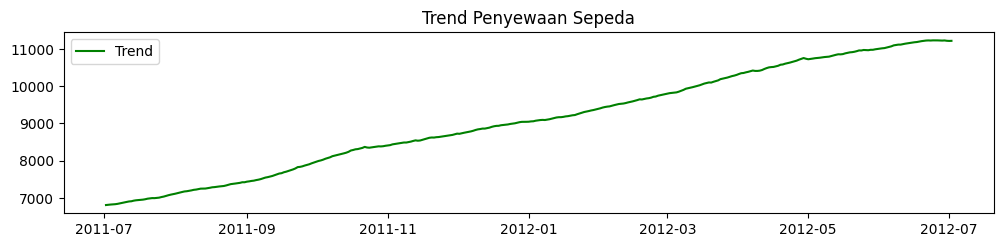

In [67]:

plt.figure(figsize=(12, 8))

# Plot trend (perubahan jangka panjang)
plt.subplot(311)  # Baris ke-1 dari 3 subplot
plt.plot(decomposition.trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.title('Trend Penyewaan Sepeda')

Text(0.5, 1.0, 'Komponen Residual (Sisa)')

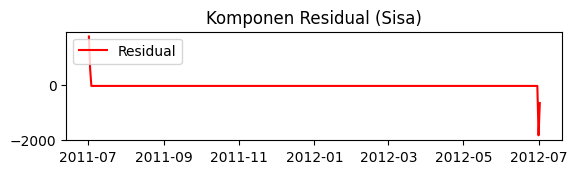

In [68]:
# Plot residual (data yang tidak bisa dijelaskan oleh tren dan seasonality)
plt.subplot(313)  # Baris ke-3 dari 3 subplot
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Komponen Residual (Sisa)')

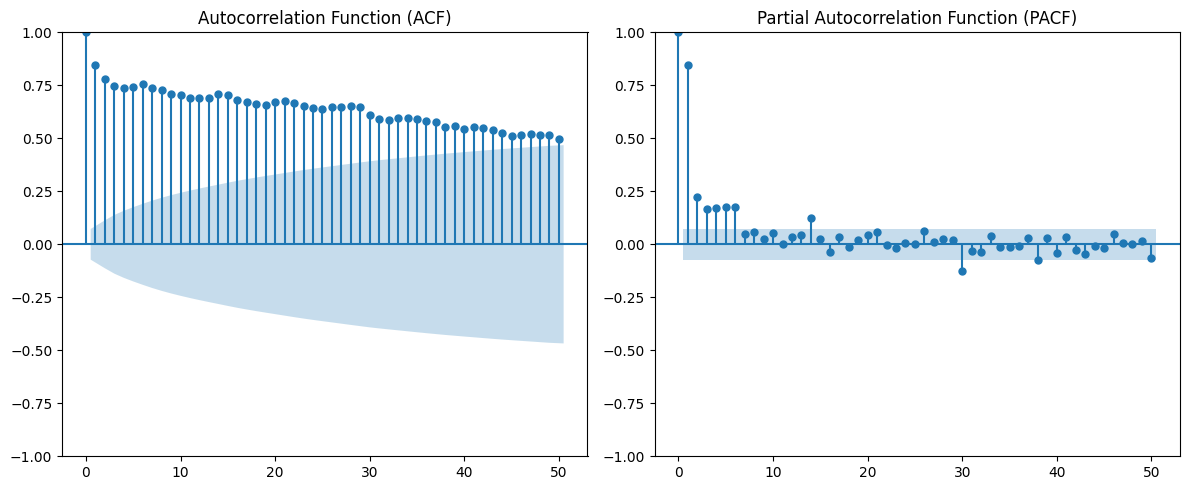

In [76]:

# Pastikan 'dteday' dalam format datetime
merged_df['dateday'] = pd.to_datetime(merged_df['dateday'])

# Mengelompokkan data berdasarkan tanggal untuk mendapatkan penyewaan per hari
df_daily_new = merged_df.groupby('dateday')['total_rent'].sum().reset_index()

# Plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 5))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(df_daily_new['total_rent'], lags=50, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(df_daily_new['total_rent'], lags=50, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


## Conclusion

- Bisa diambil kesimpulan bahwa musim dan cuaca cukup berpengaruh pada banyaknya rental sepeda contohnya pada musim gugur dan cuaca cerah adalah jumlah rental yang paling besar (enak buat bersepeda) sedangkan yang paling kecil adalah musim panas dan cuacanya tidak mendukung (lightrain,snow)
- Bisa dilihat bahwa sebenernya hari jumat adalah hari dimana total rental paling banyak tetapi mungkin dikenyataannya hanya dihari tertentu saja yang menyumbang data tersebut.pada Rata rata,hari kamis adalah hari terbanyak untuk penyewaan sepeda .oleh karna itu,bisa diadakan promo dihari kamis serta jumat sesuai dengan hasil analisis dan visualiasi